In [1]:
import cv2

In [2]:
!pwd

/content


In [3]:
cd drive/My\ Drive/Colab\ Notebooks/Pictures/

/content/drive/My Drive/Colab Notebooks/Pictures


In [4]:
img=cv2.imread("IMG-20200326-WA0022.jpg",0)


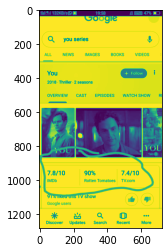

In [5]:
import matplotlib.pyplot as plt

plt.imshow(img)

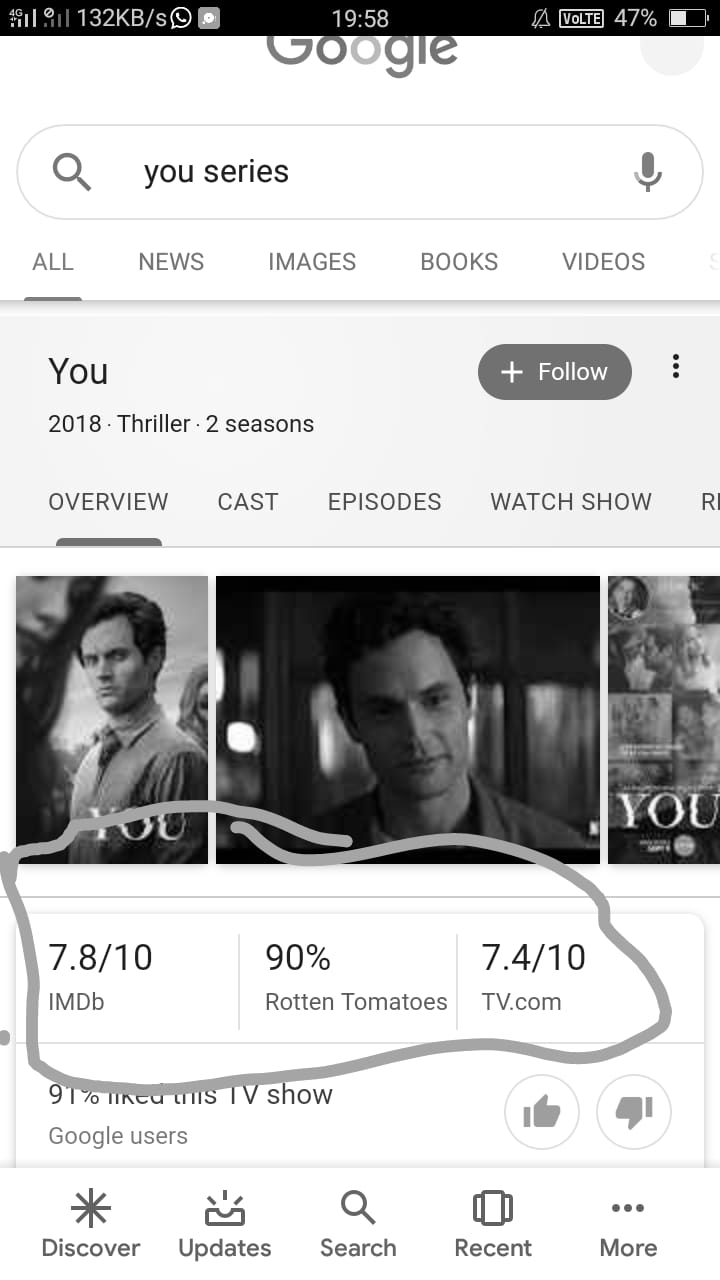

In [6]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [7]:
img2=cv2.imread("/content/drive/My Drive/Colab Notebooks/Pictures/IMG-20200326-WA0023.jpg")

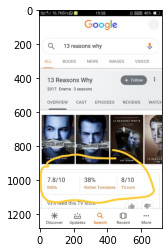

In [8]:
plt.imshow(img2)

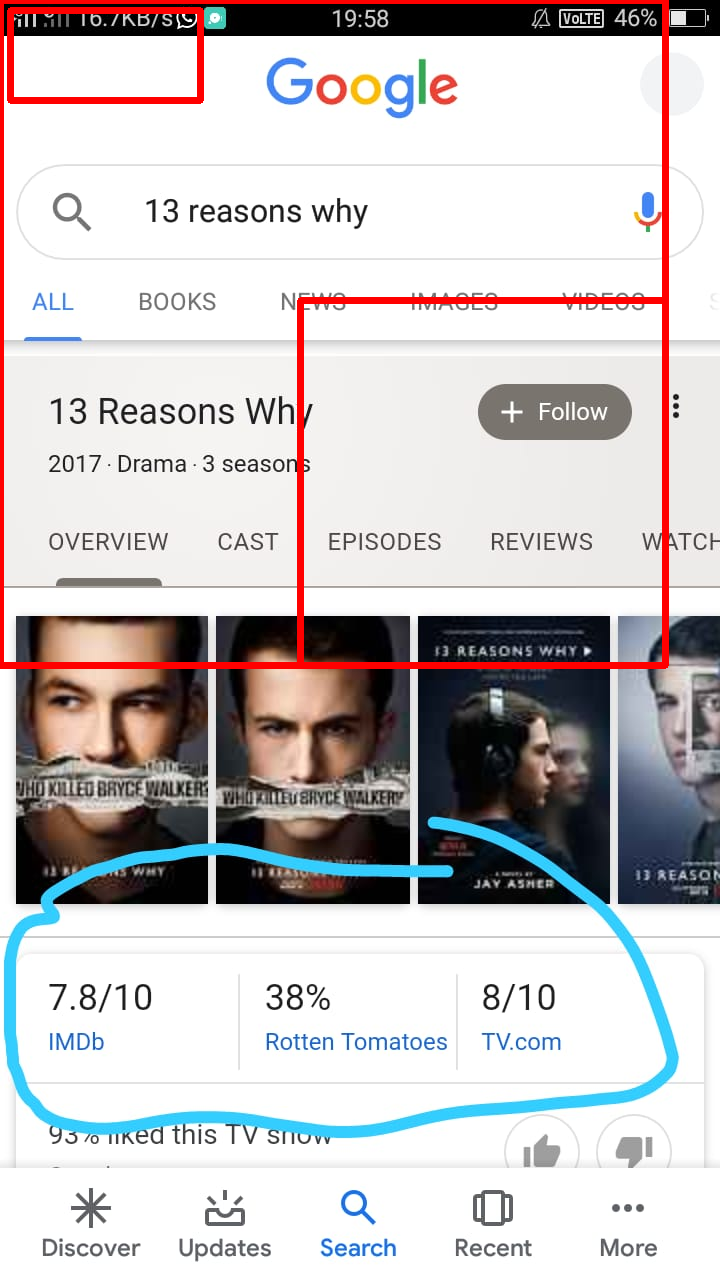

In [9]:
cv2.rectangle(img2,(0,0),(665,665),(0,0,255),5)
cv2.rectangle(img2,(300,300),(665,665),(0,0,255),5)
cv2.rectangle(img2,(10,10),(200,100),(0,0,255),5)
cv2_imshow(img2)

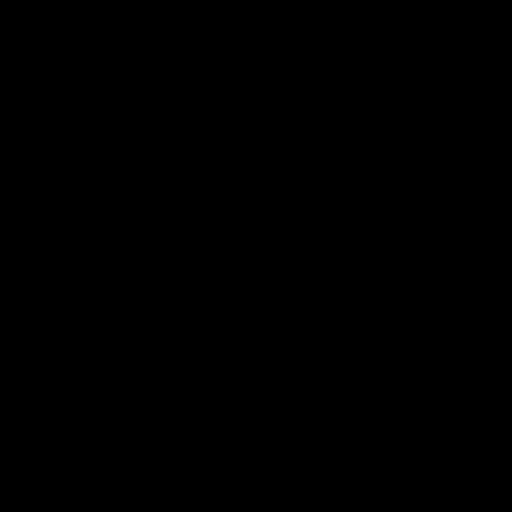

error: ignored

In [10]:
###click_event will nor work on google colab and here we are not work with cv2.imshow...we re working with cv2_imshow(colab function)
###so here o/p is something like this...
import numpy as np
blank=np.zeros((512,512,3),np.uint8)
cv2_imshow(blank)

def click_event(event,x,y,flags,param):
  if(event==cv2.EVENT_LBUTTONDOWN):
    print(str(x)+"  ,  "+str(y))
    font=cv2.FONT_HERSHEY_SIMPLEX
    tt=str(x)+"  ,  "+str(y)
    cv2.putText(blank,tt,(x,y),font,1,(0,255,255),2)
    cv2_imshow(blank)

cv2.setMouseCallback("image",click_event)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
iii=img2[70:700,0:300]
plt.imshow(iii)

In [ ]:
_,th1=cv2.threshold(img,100,255,cv2.THRESH_BINARY)
cv2_imshow(th1)

In [ ]:
th2=cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,15,2)
cv2_imshow(th2)

In [ ]:
a

#EDGE DETECTION

In [ ]:
lap=cv2.Laplacian(img,cv2.CV_64F)
lap=np.uint8(np.absolute(lap))
cv2_imshow(lap)

In [ ]:
lap=cv2.Sobel(img,cv2.CV_64F,1,0)
lap=np.uint8(np.absolute(lap))
cv2_imshow(lap)

In [ ]:
 lap=cv2.Sobel(img,cv2.CV_64F,0,1)
lap=np.uint8(np.absolute(lap))
cv2_imshow(lap)

#canny edge detection

######(1)noise reduction
######(2)gradient
######(3)non-max suppression
######(4)double threshold
######(5)edge tracking

In [ ]:
can=cv2.Canny(img,100,200)
cv2_imshow(can)

##GAUSIAN AND LAPLACIAN PYRAMID

In [ ]:
new=cv2.pyrDown(img)
new=cv2.cvtColor(new,cv2.COLOR_BGR2RGB)

In [ ]:
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(img2)
plt.subplot(1,3,3)
plt.imshow(new)

#FIND ALL THE EDGES
##contours

In [ ]:
img2gray=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

In [ ]:
_,thh=cv2.threshold(img2gray,127,255,0)
con,hie=cv2.findContours(thh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
print(len(con))

In [ ]:
cv2.drawContours(img2,con,-1,[0,0,255],1)
cv2_imshow(img2)

###parellel lines (hough lines)

######road

In [ ]:
### use canny result in this hough lines transform

lines=cv2.HoughLines(can,1,np.pi/180,200)

In [ ]:
for line in lines:
  rho,theta=line[0]
  a=np.cos(theta)
  b=np.sin(theta)
  x0=np.cos(theta)*rho
  y0=np.sin(theta)*rho
  x1=int(x0-1000*b)
  y1=int(y0+1000*a)
  x2=int(x0+1000*b)
  y2=int(x0-1000*b)

  cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)
cv2_imshow(img)  

In [ ]:
img3=cv2.imread("/content/drive/My Drive/Colab Notebooks/Pictures/IMG-20200326-WA0024.jpg",0)
lines=cv2.HoughLinesP(can,1,np.pi/180,100,minLineLength=500,maxLineGap=10)
for line in lines:
  x1,y1,x2,y2=line[0]
  cv2.line(img3,(x1,y1),(x2,y2),(0,255,0),2)

cv2_imshow(img3)


In [ ]:
blur=cv2.medianBlur(img3,5)
cir=cv2.HoughCircles(blur,cv2.HOUGH_GRADIENT,1,20,param1=50,param2=30,minRadius=0)
detected_cir=np.uint16(np.around(cir))
for (x,y,r) in detected_cir[0,:]:
  cv2.circle(img3,(x,y),r,(0,255,0),1)
cv2_imshow(img3)


#face detection

In [ ]:
 img=cv2.imread("/content/drive/My Drive/Colab Notebooks/Pictures/IMG-20200326-WA0022.jpg",0)
 detect=cv2.CascadeClassifier("/content/drive/My Drive/facedetector/face_detector.xml")
 faces=detect.detectMultiScale(img,1.1,4)

 for x,y,w,h in faces:
   cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
cv2_imshow(img)

In [ ]:
plt.imshow(img)

In [ ]:
crop=img[0:50,100:600]
cv2_imshow(crop)

##HArris corner detection

In [ ]:
img=cv2.imread("/content/drive/My Drive/Colab Notebooks/Pictures/IMG-20200326-WA0022.jpg")
imgha=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
imgha=np.float32(imgha)
dist=cv2.cornerHarris(imgha,2,3,0.04)
dist=cv2.dilate(dist,None)
img[dist>0.01*dist.max()]=[0,0,255]
cv2_imshow(img)

#shi tomashi corner detector

#####better than harrish corner

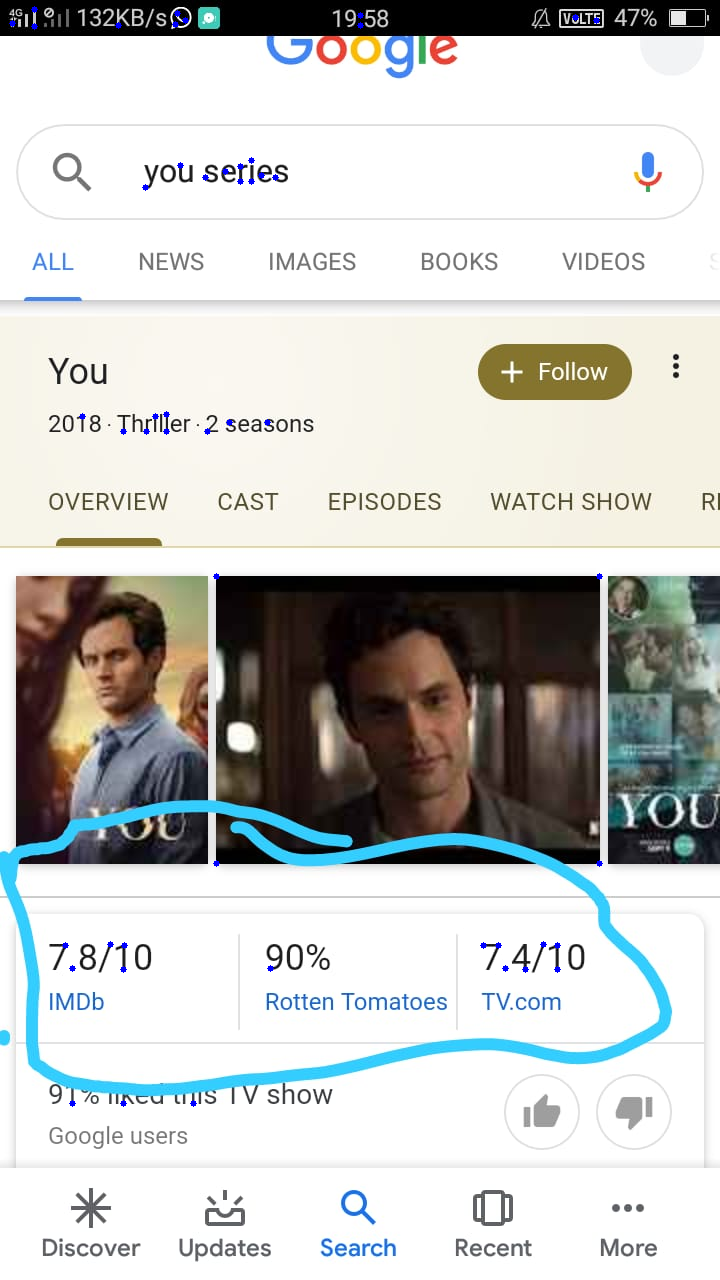

In [24]:
img=cv2.imread("/content/drive/My Drive/Colab Notebooks/Pictures/IMG-20200326-WA0022.jpg")
imgha=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
corner=cv2.goodFeaturesToTrack(imgha,50,0.01,10)
corners=np.int0(corner)
for i in corners:
  x,y=i.ravel()
  cv2.circle(img,(x,y),3,255,-1)
cv2_imshow(img)